<a href="https://colab.research.google.com/github/SeoJunwon-developer/2023-04-15BIGData/blob/main/2023_04_18%EC%95%84%ED%8C%8C%ED%8A%B8%EB%B6%84%EC%96%91%EA%B0%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20220131.csv',encoding='cp949')
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015.0,10.0,5841
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 368 to 6358
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         484 non-null    object 
 1   규모구분        484 non-null    object 
 2   연도          484 non-null    object 
 3   월           484 non-null    object 
 4   분양가격(제곱미터)  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 22.7+ KB


In [62]:
#  분양가격(제곱미터)이 왜 object인지?
nullindex = []
for idx,price in enumerate(df['분양가격(제곱미터)'].values):
    try:
        int(price.strip())
    except:
        nullindex.append(idx)
df.loc[idx]

지역명               광주
규모구분            모든면적
연도            2021.0
월                8.0
분양가격(제곱미터)      4291
Name: 5975, dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         5976 non-null   object 
 1   규모구분        5976 non-null   object 
 2   연도          5976 non-null   float64
 3   월           5976 non-null   float64
 4   분양가격(제곱미터)  5976 non-null   object 
dtypes: float64(2), object(3)
memory usage: 409.2+ KB


In [ ]:
# 분양가격(제곱미터)에서 숫자 로 타입을 바꾸기전에 확인해보기
# 강사님코드 
df = df.reset_index(drop=True)
index_ = [idx for idx,price in enumerate(df['분양가격(제곱미터)']) if not price .isnumeric()]
df.loc[index_,'분양가격(제곱미터)'] = 0

In [ ]:
# 강사님 코드
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].astype(np.float64)

In [ ]:
# 다른사람이 짠 코드
df = df.dropna(thresh = 1)
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].replace('  ', np.nan).replace(' ', np.nan).astype('float64')
df['연도'] = df['연도'].astype(int).astype(str) 
df['월'] = df['월'].astype(int).astype(str) # int로 바꿧다가 str으로 바꾸면 소수점은 사라진다.
df['분양가격(제곱미터)'].fillna( df.groupby(['지역명', '규모구분', '연도', '월'])['분양가격(제곱미터)'].transform('mean'), inplace=True )
df['분양가격(제곱미터)'].fillna( df.groupby(['지역명', '규모구분', '연도'])['분양가격(제곱미터)'].transform('mean'), inplace=True )
df['분양가격(제곱미터)'].fillna( df.groupby(['지역명', '규모구분'])['분양가격(제곱미터)'].transform('mean'), inplace=True )

In [3]:
# 최종목표는 숫자단위로 변경
# 내가한 코드
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].apply(lambda x: str(x).replace(',', '').strip()) # strip()로 공백없애기
df.loc[df['분양가격(제곱미터)'].apply(lambda x: x.isdigit()), '분양가격(제곱미터)'] = df['분양가격(제곱미터)'].astype(float,errors='ignore') # 타입을 원소에서 숫자로 변경
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].fillna(np.nan) #  nan값을 fillna 로 채우기 

In [4]:
# 결측치 여부 확인 및 대처
df = df.dropna(axis=0) # 0개이상잇을떄 nan값을 전부 지우는 코드 
df.isnull().sum()

지역명           0
규모구분          0
연도            0
월             0
분양가격(제곱미터)    0
dtype: int64

In [5]:
# 연도와 열은 카테고리 string으로 변경이 필요 float타입이 아님
df['연도'] = df['연도'].astype(int).astype(str) 
df['월'] = df['월'].astype(int).astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6460 non-null   object
 1   규모구분        6460 non-null   object
 2   연도          6460 non-null   object
 3   월           6460 non-null   object
 4   분양가격(제곱미터)  6460 non-null   object
dtypes: object(5)
memory usage: 302.8+ KB


In [3]:
# 각 컬럼에 대한 데이터 타입을 조사
df = df.dropna(how='all') # 모든 row가 null인 데이터만 삭제
df[df['분양가격(제곱미터)'].isna()].head() # 확인용

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016.0,2.0,NaN
369,광주,전용면적 102제곱미터초과,2016.0,2.0,NaN
374,대전,전용면적 102제곱미터초과,2016.0,2.0,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016.0,2.0,NaN
421,제주,전용면적 60제곱미터이하,2016.0,2.0,NaN


In [4]:
df['연도'] = df['연도'].astype(int).astype(str) 
df['월'] = df['월'].astype(int).astype(str)

In [5]:
df['분양가격(제곱미터)'] = pd.to_numeric(df['분양가격(제곱미터)'] , errors = 'coerce') # 바꿀수 없는 타입을 만나면 na로 변경하고 처리

In [6]:
df['평당분양가격'] = df['분양가격(제곱미터)'] * 3.3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6460 entries, 0 to 6459
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6460 non-null   object 
 1   규모구분        6460 non-null   object 
 2   연도          6460 non-null   object 
 3   월           6460 non-null   object 
 4   분양가격(제곱미터)  5940 non-null   float64
 5   평당분양가격      5940 non-null   float64
dtypes: float64(2), object(4)
memory usage: 353.3+ KB


In [8]:
# # 결측치를 채우는 방법?
# # 내가 한방법 
# df['평당분양가격'] = df['평당분양가격'].apply(lambda x: str(x).replace(',', '').strip())
# df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].apply(lambda x: str(x).replace(',', '').strip())
# df['평당분양가격'] = df['평당분양가격'].fillna(np.nan).mean
# df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].fillna(np.nan).mean

In [9]:
# 결측치를 채우는 방법?
# 강사님이 하신 코드
grouped = df.groupby(['지역명','규모구분','연도']).transform('mean')
grouped['분양가격(제곱미터)']
df['분양가격(제곱미터)'].fillna(grouped['분양가격(제곱미터)'],inplace=True)
df['평당분양가격'].fillna(grouped['평당분양가격'],inplace=True)

<ipython-input-9-2a305968f41f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['지역명','규모구분','연도']).transform('mean')


In [10]:
df.dropna(inplace=True)

In [11]:
df.reset_index(drop=True,inplace=True)

In [36]:
# 전국 분양 가격 동향
df.pivot_table('평당분양가격','규모구분','연도')

연도,2015,2016,2017,2018,2019,2020,2021,2022
규모구분,,,,,,,,
모든면적,8893.047059,9293.042647,9927.322059,10673.695588,11540.730882,12289.410294,13706.889706,14170.976471
전용면적 102제곱미터초과,9837.226667,10565.093627,11373.334804,11665.858073,13330.830469,13679.253361,14994.990312,15285.820000
전용면적 60제곱미터이하,8951.525000,9425.813725,10222.448950,10939.995313,11402.618950,12362.968750,13027.549118,13196.311765
전용면적 60제곱미터초과 85제곱미터이하,8891.817647,9295.986765,9840.438235,10648.605882,11609.125000,12277.892647,13644.416176,14230.570588
전용면적 85제곱미터초과 102제곱미터이하,9518.506250,9914.751471,10533.684219,11177.399444,12750.296429,14211.664107,13747.288318,15146.057143


In [37]:
# 규모 구분이 전체인 데이터만 조회
df_year =  df[df['규모구분'] == '모든면적']
df_region_year = df_year.pivot_table('평당분양가격','지역명','연도')
df_region_year['변동액'] = (df_region_year['2022'] - df_region_year['2015']).astype(int)
df_region_year

연도,2015,2016,2017,2018,2019,2020,2021,2022,변동액
지역명,,,,,,,,,
강원,7159.9,7011.125,7170.625,7680.750,8141.650,9331.300,9716.850,10002.3,2842
경기,10377.4,11220.000,11840.675,13185.975,14468.850,14383.325,14183.125,15071.1,4693
경남,7585.6,7847.950,8163.925,9019.450,9870.850,10160.700,10505.000,10936.2,3350
경북,7170.9,7360.650,7802.575,8505.200,8856.650,9544.975,10333.400,10880.1,3709
광주,8052.0,8898.725,9471.000,9855.725,11822.800,12500.125,14020.875,14576.1,6524
대구,9232.3,10310.025,11507.100,12075.800,13852.025,15145.075,15558.125,15981.9,6749
대전,8098.2,8501.625,9056.025,10180.225,11777.700,11094.050,11914.100,13157.1,5058
부산,10307.0,10429.925,11663.575,12997.875,13116.400,13247.575,14645.675,16945.5,6638
서울,19725.2,20663.500,21425.250,22889.350,26131.050,26910.125,30115.250,31620.6,11895


In [38]:
df_region_year['변동액'] = (df_region_year['2022'] - df_region_year['2015']).astype(int)
region_year_max = np.argmax(df_region_year['변동액'])
region_year_min = np.argmin(df_region_year['변동액'])
region_year_mean = np.mean(df_region_year['변동액'])

In [39]:
df_region_year.iloc[region_year_min].변동액

2429.0

In [40]:
name = df_region_year.iloc[region_year_max].name
place = df_region_year.iloc[region_year_max].변동액
print(f"2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 큰 지역은 {name}이며 상승액은 평당{place}이다")

name = df_region_year.iloc[region_year_min].name
place = df_region_year.iloc[region_year_min].변동액
print(f"2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 적은 지역은 {name}이며 상승액은 평당{place}이다")
print(f"전국 평균 평당 변동 분양가는 {region_year_mean} 이다")

2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 큰 지역은 제주이며 상승액은 평당14288.0이다
2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 적은 지역은 충북이며 상승액은 평당2429.0이다
전국 평균 평당 변동 분양가는 5277.35294117647 이다


In [17]:
# 한글처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [18]:
# 런타임 재시작 이후
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

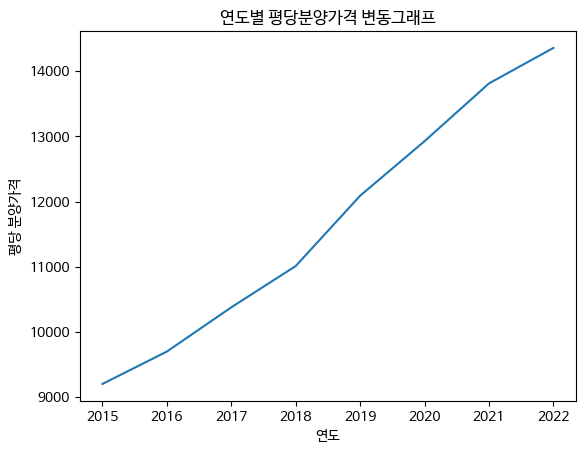

In [42]:
# 연도별 변동그래프
# x:지역 y:평당분양 
import pandas as pd
import matplotlib.pyplot as plt

df_yearly_avg = df.groupby('연도')['평당분양가격'].mean()


plt.plot(df_yearly_avg.index, df_yearly_avg.values)
plt.xlabel('연도')
plt.ylabel('평당 분양가격')
plt.title('연도별 평당분양가격 변동그래프')
plt.show()

<ipython-input-66-8f68564b6d22>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['지역명', '연도']).mean()['평당분양가격']


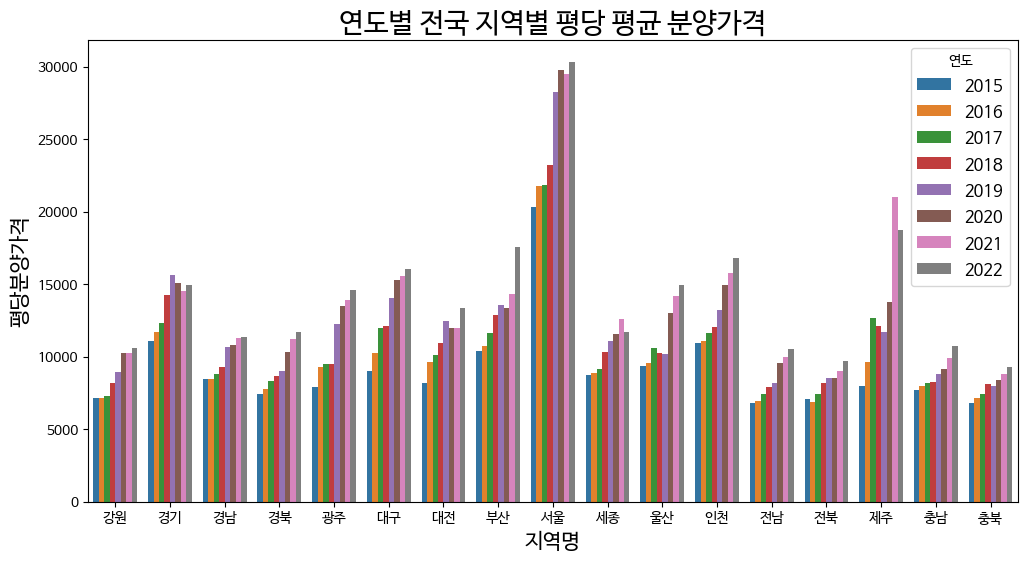

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['평당분양가격'] = df['분양가격(제곱미터)'] * 3.3

df_grouped = df.groupby(['지역명', '연도']).mean()['평당분양가격']

plt.figure(figsize=(12,6))
sns.barplot(data=df_grouped.reset_index(), x='지역명', y='평당분양가격', hue='연도')
plt.title('연도별 전국 지역별 평당 평균 분양가격', size=20)
plt.xlabel('지역명', size=15)
plt.ylabel('평당분양가격', size=15)
plt.legend(title='연도', fontsize=12)
plt.show()

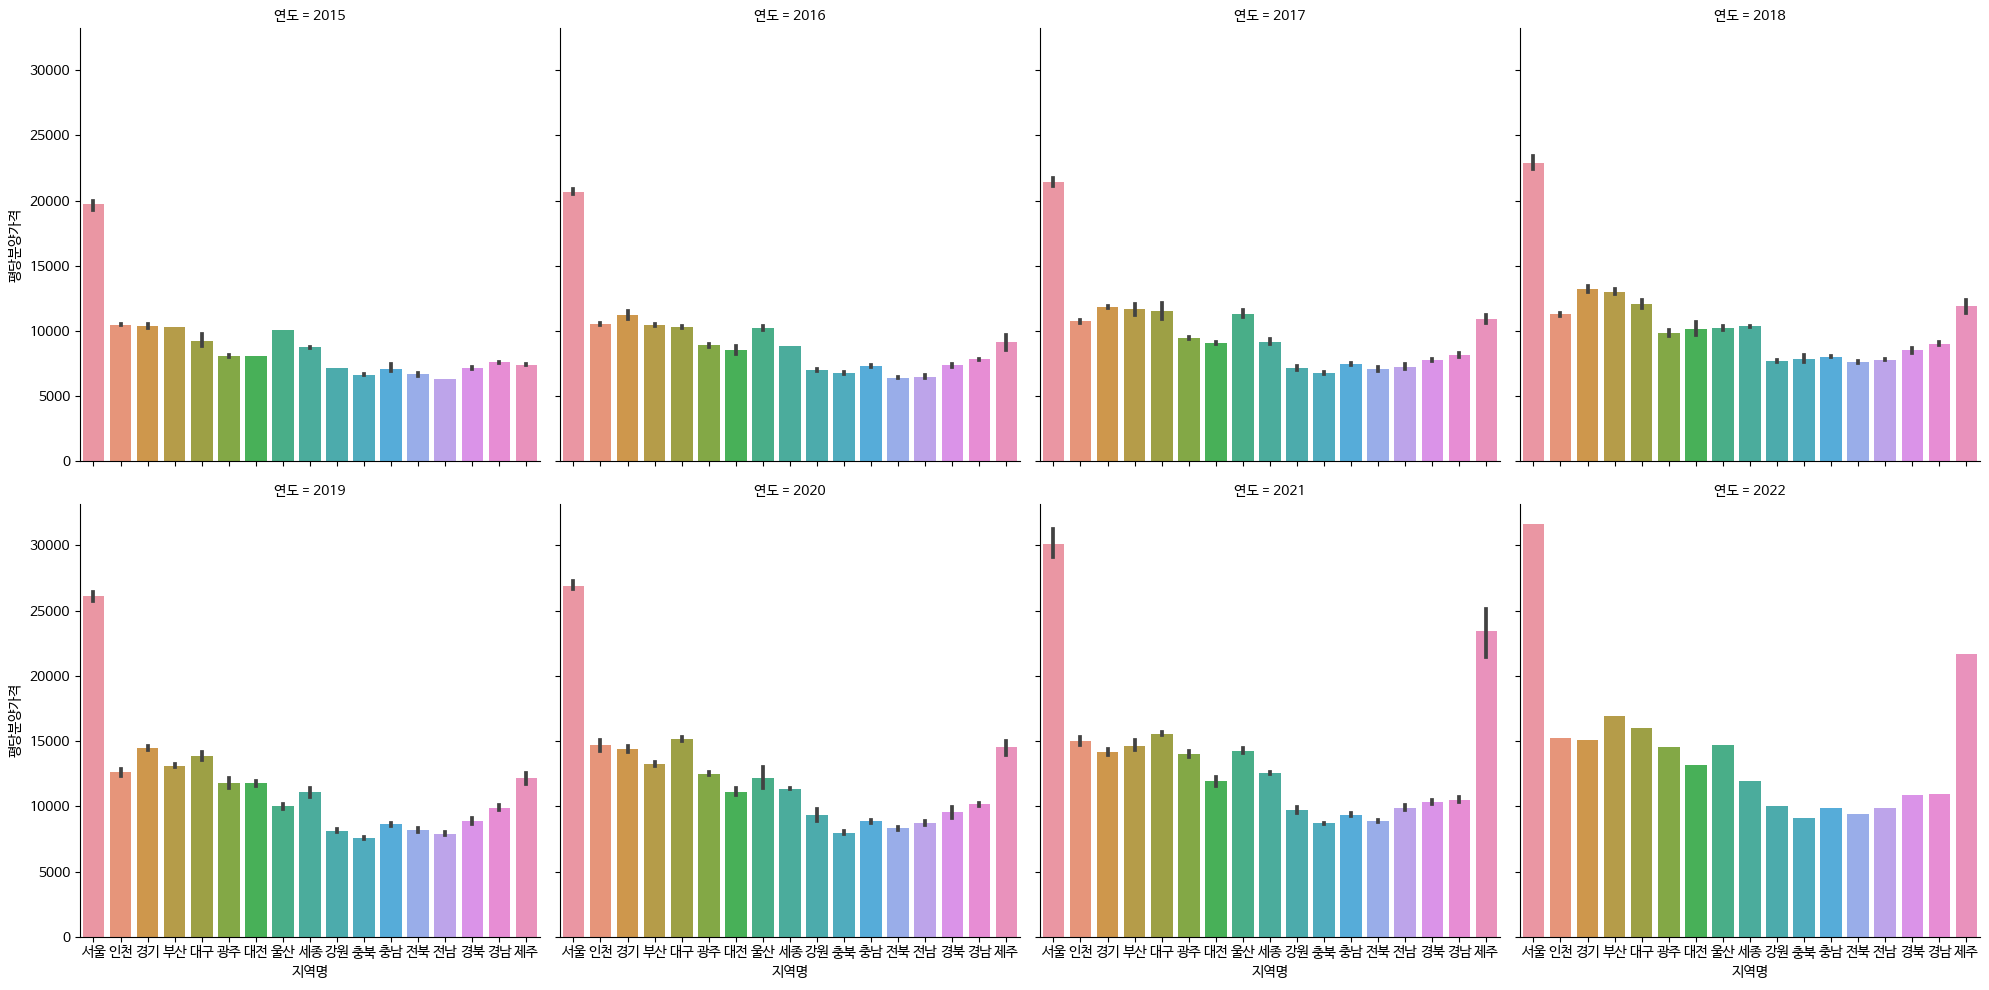

In [50]:
import seaborn as sns
# sns.barplot(data=df_year, x= '지역명', y= '평당분양가격', hue= '연도')
sns.catplot(data=df_year, x= '지역명', y= '평당분양가격', col= '연도',kind='bar',col_wrap=4) # 데이터양이많다면 이방식대로 하는걸 추천한다.

In [52]:
df_region_year.T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7159.900,10377.400,7585.600,7170.900,8052.000,9232.300,8098.200,10307.000,19725.200,8750.500,10052.900,10484.100,6317.300,6703.40,7405.200,7114.800,6645.100
2016,7011.125,11220.000,7847.950,7360.650,8898.725,10310.025,8501.625,10429.925,20663.500,8860.500,10208.550,10532.500,6488.625,6417.95,9129.175,7330.675,6770.225
2017,7170.625,11840.675,8163.925,7802.575,9471.000,11507.100,9056.025,11663.575,21425.250,9133.025,11327.525,10749.475,7245.700,7074.65,10907.325,7455.800,6770.225
2018,7680.750,13185.975,9019.450,8505.200,9855.725,12075.800,10180.225,12997.875,22889.350,10354.850,10241.400,11273.900,7789.100,7625.75,11890.725,8012.675,7874.075
2019,8141.650,14468.850,9870.850,8856.650,11822.800,13852.025,11777.700,13116.400,26131.050,11078.925,10022.100,12634.875,7902.400,8196.65,12137.950,8606.950,7574.600
2020,9331.300,14383.325,10160.700,9544.975,12500.125,15145.075,11094.050,13247.575,26910.125,11355.300,12202.850,14674.000,8696.875,8317.10,14540.900,8856.100,7959.600
2021,9716.850,14183.125,10505.000,10333.400,14020.875,15558.125,11914.100,14645.675,30115.250,12561.175,14274.975,14991.625,9907.700,8838.50,23423.950,9345.600,8681.200
2022,10002.300,15071.100,10936.200,10880.100,14576.100,15981.900,13157.100,16945.500,31620.600,11926.200,14671.800,15265.800,9890.100,9378.60,21694.200,9834.000,9075.000
변동액,2842.000,4693.000,3350.000,3709.000,6524.000,6749.000,5058.000,6638.000,11895.000,3175.000,4618.000,4781.000,3572.000,2675.00,14288.000,2719.000,2429.000


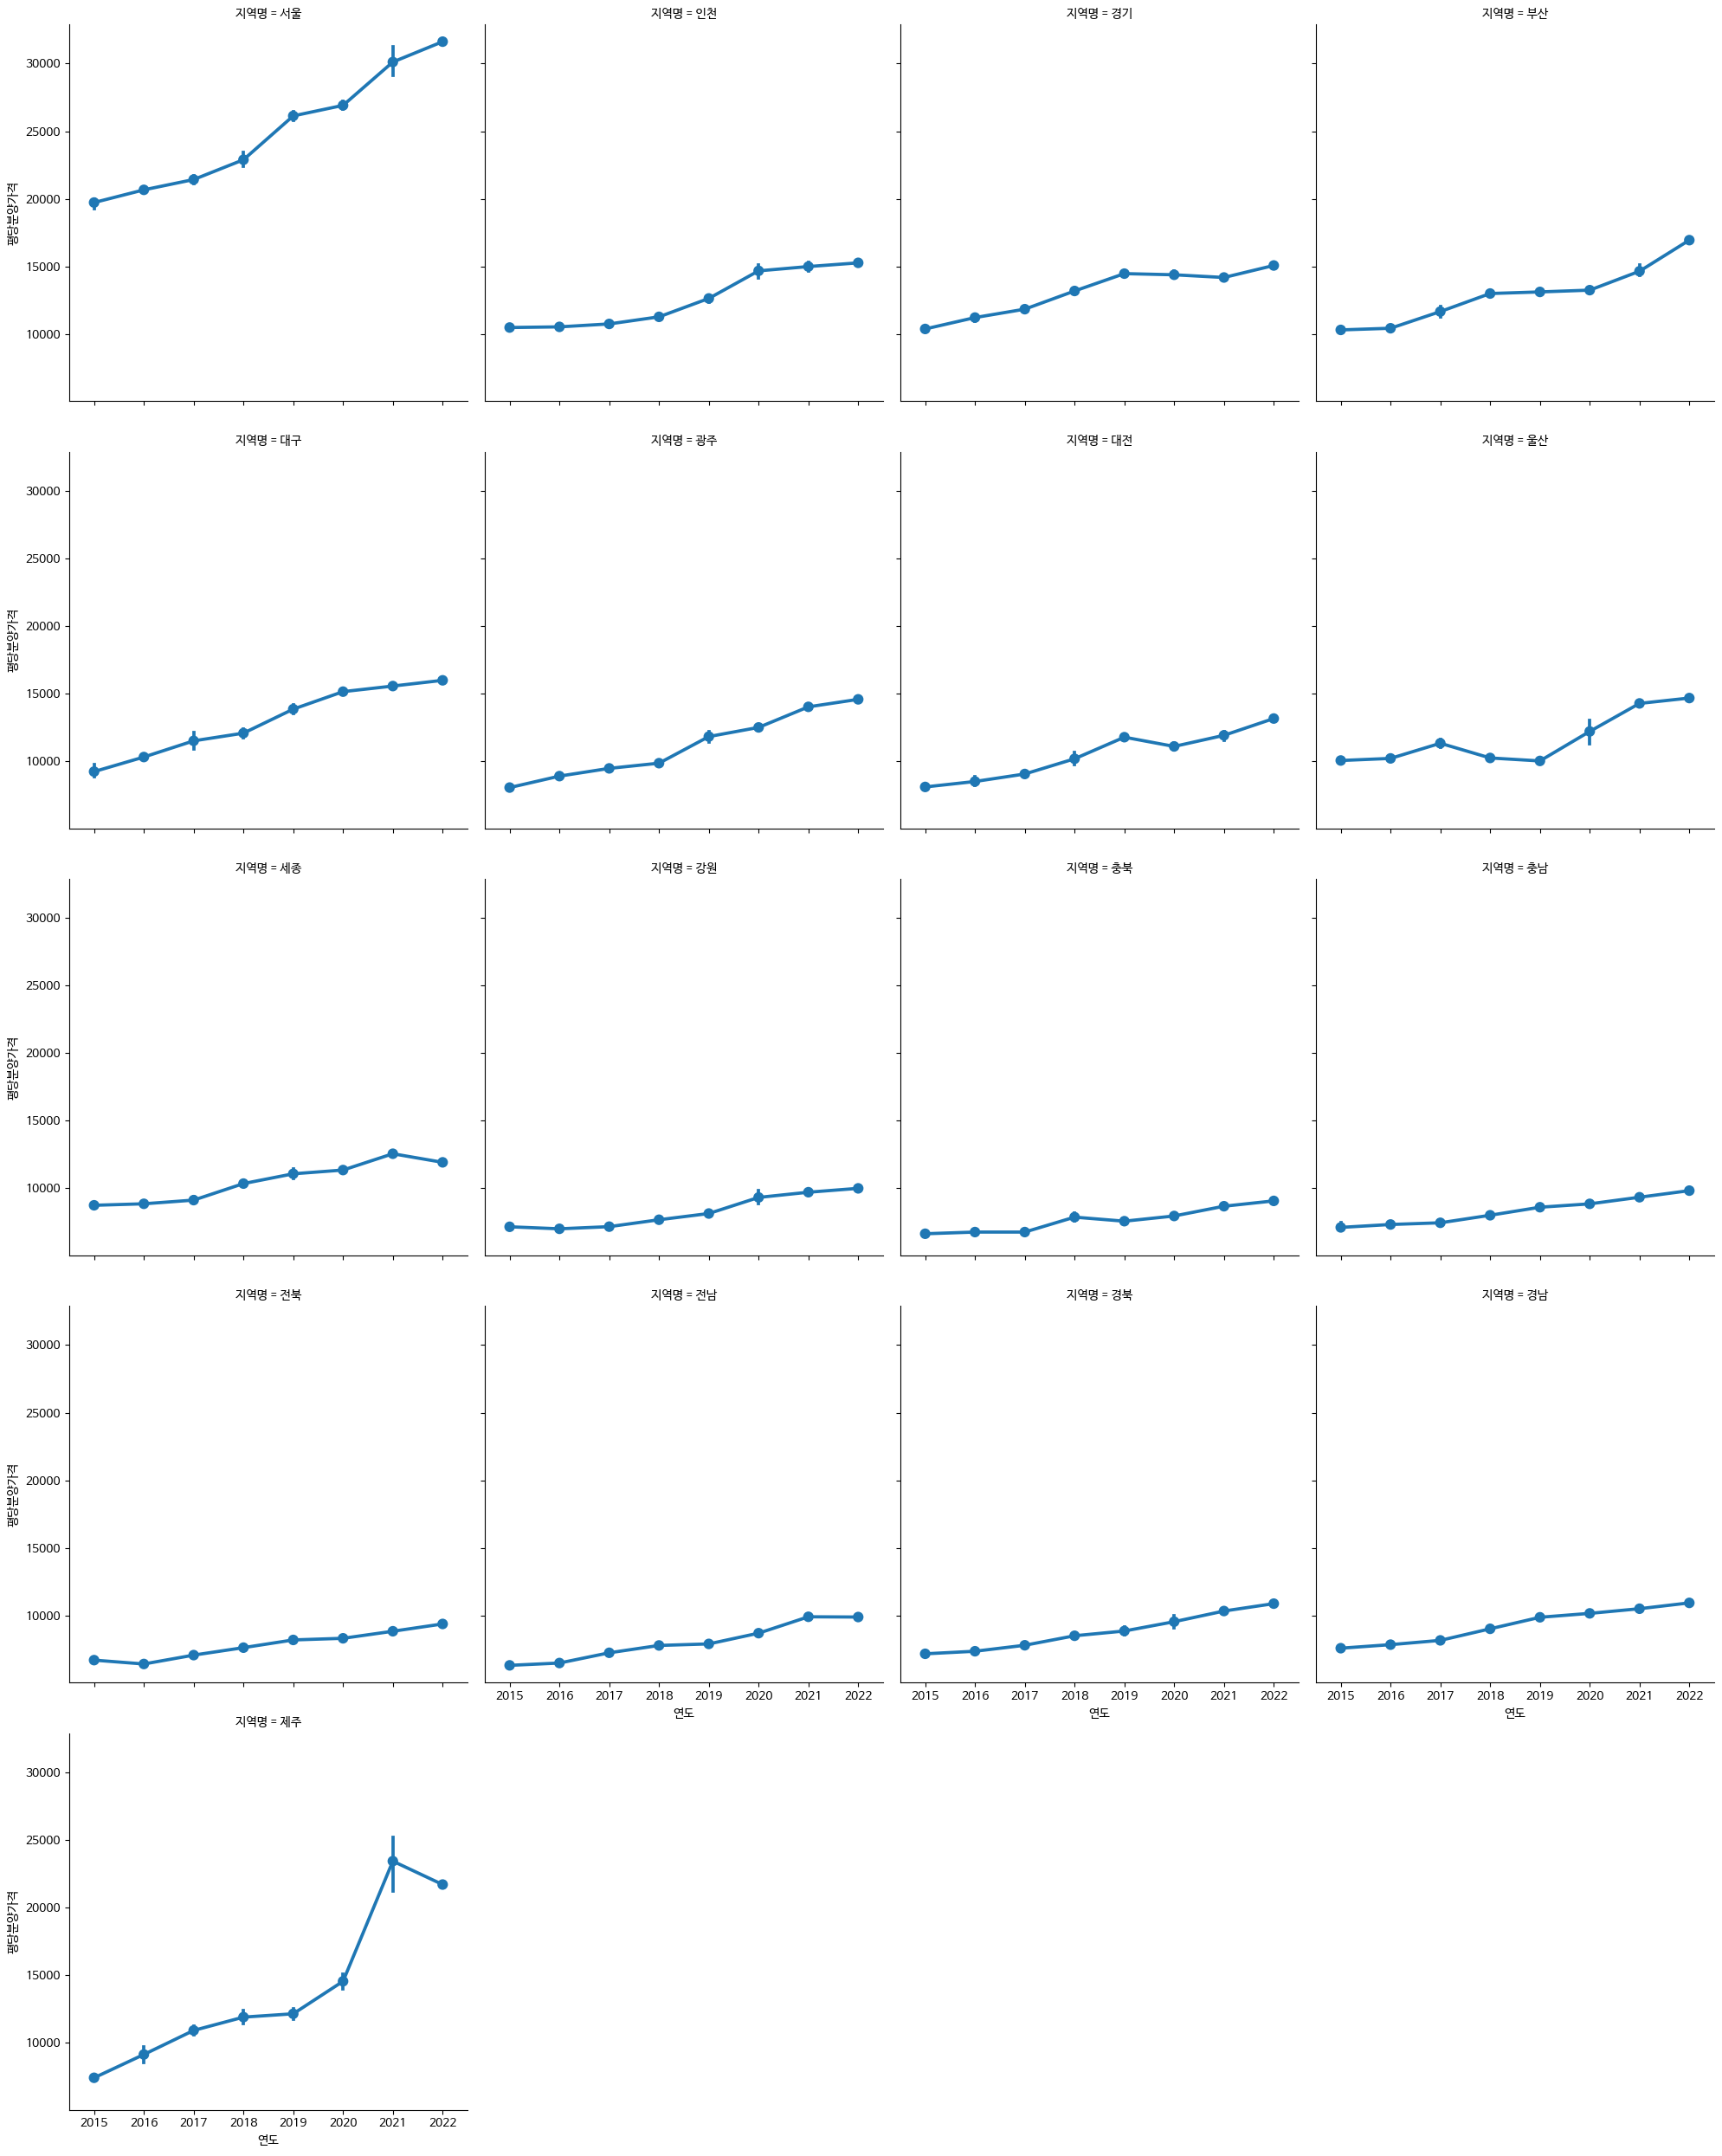

In [63]:
# 각각의 지역별로 x축은 연도 y축은 평균분양가 plot로 표현
# 지역별 변동그래프
sns.catplot(data=df_year, x= '연도', y= '평당분양가격', col= '지역명',kind='point',col_wrap=4)